In [53]:
import os # to get the paths
from bs4 import BeautifulSoup # to sparse the html code  
import re # clean data
import pandas as pd 
import polars as pl
import seaborn as sns

In [8]:
root_folder = r'F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah' 
def get_all_files(root_folder):
    books_paths = []
    # Walk through the directory structure
    for dirpath, dirnames, filenames in os.walk(root_folder):
        # Append full path of each file to the list
        for filename in filenames:
            books_paths.append(os.path.join(dirpath, filename))
    return books_paths



books_paths = get_all_files(root_folder)

for file in books_paths:
    print(file)
print(len(books_paths))

F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\alradmoriyah.htm
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\أحاديث القصاص.htm
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\أمراض القلوب وشفاؤها.htm
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الأحاديث العوالي من جزء ابن عرفة العبدي.htm
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الأربعون التيمية.htm
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الأمر بالمعروف والنهي عن المنكر- ابن تيمية.htm
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الإخنائية أو الرد على الإخنائي ت العنزي.htm
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الإخنائية أو الرد على الإخنائي ت زهوي.htm
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الإكليل في المتشابه والتأويل.htm
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الإيمان ا

In [10]:
def read_file(book_path):
    with open(book_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    soup = BeautifulSoup(html_content, 'html.parser')
    return soup


In [12]:
#delete the info pages
def remove_info_page(soup):
    class_name = 'PageNumber'
    for parent in soup.find_all('div', attrs={'class':'PageText'}):
        if not parent.find(class_=class_name):
            parent.decompose()
    return soup

In [14]:
# delete the pagehead which contains the title and page number
# while keeping the book text
def remove_pagehead(soup):
    for result in soup.find_all('div', attrs={'class':'PageHead'}):
        result.decompose()
    return soup

In [16]:
# remove the title
def remove_title(soup):
    for result in soup.find_all('span', attrs={'class':'title'}):
        result.decompose()
    return soup

In [18]:
 def remove_footnote(soup):
    for result in soup.find_all('div', attrs={'class':'footnote'}):
        result.decompose()
    return soup

In [20]:
# removeing every thing that comes befour the booktext
def remove_but_book(soup):
    main_div = soup.find('div', attrs={'class':'Main'})
    #split the entences by the .
    main_div.text.split('.')
    return main_div

In [22]:
def clean_text(text):
    text = text.text
    # Remove all non-word characters except punctuation marks
    cleaned_text = re.sub(r'[^\w\s,.،؟؛]|[\d]', '', text)
    return cleaned_text

In [24]:
def to_dataframe(text, all_text_data=None):
    if all_text_data is None:
        all_text_data = pd.DataFrame(columns=['text'])
    text.split('.')
    df = pd.DataFrame([{'text':text.split('.')}])
    df = df.explode('text')
    df.reset_index(drop=True, inplace=True)
    all_text_data = pd.concat([all_text_data, df], ignore_index=True)
    return all_text_data

In [26]:
# taking some books to validate the model ...

i = 0
for book in books_paths:
    print(book, i)
    i+=1
# all of them are the first volume..
# al jauab al ssaheeh i will take 83
# al ssafadiah 96
# alfatawah al kubrah 98
test_books_idx = [83, 96, 98]
test_books = []
for book in test_books_idx:
    test_books.append(books_paths[book])

# droping these books from the original list, so the model dont takes is and train on it:
for index in sorted(test_books_idx, reverse=True):
    del books_paths[index]

F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\alradmoriyah.htm 0
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\أحاديث القصاص.htm 1
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\أمراض القلوب وشفاؤها.htm 2
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الأحاديث العوالي من جزء ابن عرفة العبدي.htm 3
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الأربعون التيمية.htm 4
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الأمر بالمعروف والنهي عن المنكر- ابن تيمية.htm 5
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الإخنائية أو الرد على الإخنائي ت العنزي.htm 6
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الإخنائية أو الرد على الإخنائي ت زهوي.htm 7
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الإكليل في المتشابه والتأويل.htm 8
F:\language_model_project\py_projects\shamilah\data\raw\from_

In [28]:
# checking if the list still has these elements in it:
# we should see differente numbers..
for i in test_books_idx:
    print(books_paths[i], i)
# + checking the lenght 
print(len(books_paths))

F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الجواب الصحيح لمن بدل دين المسيح لابن تيمية\002.htm 83
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الفتاوى الكبرى لابن تيمية\002.htm 96
F:\language_model_project\py_projects\shamilah\data\raw\from_shamilah\الفتاوى الكبرى لابن تيمية\004.htm 98
210


In [30]:
%%time
all_train_data = pd.DataFrame()
# looping over all of the files:
# so we collect all of the data in one pandas DF
for book in books_paths:
    soup = read_file(book)
    soup_rm_info = remove_info_page(soup)
    soup_rm_page = remove_pagehead(soup_rm_info)
    soup_rm_title = remove_title(soup_rm_page)
    soup_rm_note = remove_footnote(soup_rm_title)
    soup_just_book = remove_but_book(soup_rm_note)
    text = clean_text(soup_just_book)
    all_train_data = to_dataframe(text, all_train_data)

CPU times: total: 14min 47s
Wall time: 16min 34s


In [31]:
%%time
all_test_data = pd.DataFrame()
# looping over all of the files:
# so we collect all of the data in one pandas DF
for book in test_books:
    soup = read_file(book)
    soup_rm_info = remove_info_page(soup)
    soup_rm_page = remove_pagehead(soup_rm_info)
    soup_rm_title = remove_title(soup_rm_page)
    soup_rm_note = remove_footnote(soup_rm_title)
    soup_just_book = remove_but_book(soup_rm_note)
    text = clean_text(soup_just_book)
    all_test_data = to_dataframe(text, all_test_data)

CPU times: total: 14.5 s
Wall time: 15.7 s


In [35]:
all_train_data.head(), all_train_data.shape

(                                                text
 0  \n\n\nوبه نستعينقال الشيخ الإمام، العالم، العل...
 1  أما بعد فقد سألني من تعينت إجابتهم أن أكتب لهم...
 2  فالكلام في باب التوحيد والصفات هو من باب الخبر...
 3  \nوالإنسان يجد في نفسه الفرق بين النفي والإثبا...
 4  وإذا كان كذلك فلا بد للعبد أن يثبت لله ما يجب ...,
 (303680, 1))

In [158]:
all_train_data.to_parquet('data\extracted\training_data.parquet')
all_test_data.to_parquet('data\extracted\testing_data.parquet')

In [39]:
all_test_data.shape



(3763, 1)

In [41]:
# df = pd.read_parquet(r"F:\language_model_project\py_projects\shamilah\data\extracted\training_data.parquet")
all_train_data['text'] = all_train_data['text'].str.split(',') 
all_train_data['text'] = all_train_data.explode('text').reset_index(drop=True)
all_train_data

,text
0,\n\n\nوبه نستعينقال الشيخ الإمام، العالم، العل...
1,أما بعد فقد سألني من تعينت إجابتهم أن أكتب لهم...
2,فالكلام في باب التوحيد والصفات هو من باب الخبر...
3,\nوالإنسان يجد في نفسه الفرق بين النفي والإثبا...
4,وإذا كان كذلك فلا بد للعبد أن يثبت لله ما يجب ...
...,...
303675,وقال أسيد بن حضير لما نزلت آية التيمم ما هي بأ...
303676,\nوعمر وأبو عبيدة وأمثالهما من خيار المهاجرين،...
303677,وكذلك عمر وعثمان أفضل من علي فإنه لم يكن له في...
303678,وكان من أعظم المسلمين رعاية لحق قرابة رسول ا...


In [43]:
all_test_data['text'] = all_test_data['text'].str.split(',') 
all_test_data['text'] = all_test_data.explode('text').reset_index(drop=True)
all_test_data

,text
0,\n\nلا إله إلا الله محمد رسول الله، الحمد لله ...
1,الحمد لله الذي خلق السماوات والأرض وجعل الظلما...
2,الحمد لله الذي لم يتخذ ولدا ولم يكن له شريك في...
3,والله أكبر، الله أكبر، لا إله إلا الله، والله ...
4,الحمد لله الذي أنزل على عبده الكتاب ولم يجعل ل...
...,...
3758,والثاني أنه حرام نجس كقول مالك، والشافعي، وأحم...
3759,هل هو طاهر أم نجس والمطهرون احتجوا بأن الصحاب...
3760,وأما الجوخ فقد حكى بعض الناس أنهم يدهنونه بشحم...
3761,والله أعلم


In [45]:
# take the lenght so we know where to split and where do drop the blanks  
all_train_data['length'] = all_train_data['text'].apply(lambda x: len(x))
all_train_data

,text,length
0,\n\n\nوبه نستعينقال الشيخ الإمام، العالم، العل...,546
1,أما بعد فقد سألني من تعينت إجابتهم أن أكتب لهم...,469
2,فالكلام في باب التوحيد والصفات هو من باب الخبر...,185
3,\nوالإنسان يجد في نفسه الفرق بين النفي والإثبا...,393
4,وإذا كان كذلك فلا بد للعبد أن يثبت لله ما يجب ...,116
...,...,...
303675,وقال أسيد بن حضير لما نزلت آية التيمم ما هي بأ...,138
303676,\nوعمر وأبو عبيدة وأمثالهما من خيار المهاجرين،...,248
303677,وكذلك عمر وعثمان أفضل من علي فإنه لم يكن له في...,536
303678,وكان من أعظم المسلمين رعاية لحق قرابة رسول ا...,281


In [47]:
all_train_data = all_train_data[all_train_data['length']>0]
all_train_data

,text,length
0,\n\n\nوبه نستعينقال الشيخ الإمام، العالم، العل...,546
1,أما بعد فقد سألني من تعينت إجابتهم أن أكتب لهم...,469
2,فالكلام في باب التوحيد والصفات هو من باب الخبر...,185
3,\nوالإنسان يجد في نفسه الفرق بين النفي والإثبا...,393
4,وإذا كان كذلك فلا بد للعبد أن يثبت لله ما يجب ...,116
...,...,...
303675,وقال أسيد بن حضير لما نزلت آية التيمم ما هي بأ...,138
303676,\nوعمر وأبو عبيدة وأمثالهما من خيار المهاجرين،...,248
303677,وكذلك عمر وعثمان أفضل من علي فإنه لم يكن له في...,536
303678,وكان من أعظم المسلمين رعاية لحق قرابة رسول ا...,281


In [49]:
# Create a copy of the subset
longe = all_train_data[all_train_data['length'] > 1000].copy()
longe.describe()

,length
count,1674.000000
mean,3918.075269
std,24034.957810
min,1001.000000
25%,1094.250000
50%,1243.000000
75%,1554.500000
max,391457.000000


<Axes: ylabel='length'>

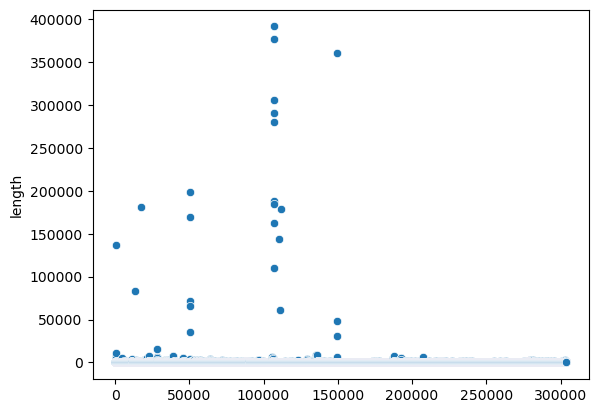

In [55]:
# some records has more than 300,000 words in it.. 

sns.scatterplot(all_train_data['length'])

In [59]:

# df[df['length']>30_000]['text'][863]
long_text = all_train_data[all_train_data['length']>30_000]['text'][863]

In [57]:
# Split The Text Into Len(text)=<1000
# We Need to Split The Text So We Can Feed It Into The Tokenizer When We are Preprocessign The Data
def split_text_into_chunks(text, chunk_size=1000):
    # Ensure the text is stripped of leading and trailing whitespace
    text = text.strip()

    words = text.split()

    # Split the text into chunks, each containing up to `chunk_size` words
    chunks = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]

    return chunks


In [61]:
longe = all_train_data[all_train_data['length'] > 1000].copy()
longe['splitted'] = longe['text'].apply(lambda x: split_text_into_chunks(x, chunk_size=1000))
longe

,text,length,splitted
12,وقال تعالى لم يلد ولم يولد ولم يكن له كفوا أح...,1096,[وقال تعالى لم يلد ولم يولد ولم يكن له كفوا أح...
519,ورأس الإسلام مطلقا شهادة أن لا إله إلا الله، و...,1145,[ورأس الإسلام مطلقا شهادة أن لا إله إلا الله، ...
560,الأصل الأول توحيد الإلهية، فإنه أخبر عن المشر...,1023,[الأصل الأول توحيد الإلهية، فإنه أخبر عن المشر...
863,\n\nالحمد لله نستعينه ونستغفره ونعوذ بالله من ...,137102,[الحمد لله نستعينه ونستغفره ونعوذ بالله من شرو...
895,\n\nأخبرنا الإمام زين الدين أبو العباس أحمد بن...,2516,[أخبرنا الإمام زين الدين أبو العباس أحمد بن عب...
...,...,...,...
303371,\nوسنصف لك عنهم من بعد، واتخذ غليظ العهود، وتو...,1862,[وسنصف لك عنهم من بعد، واتخذ غليظ العهود، وتوك...
303443,وسورة الفتح نزلت في هذه القصة، وكان ذلك العام ...,1111,[وسورة الفتح نزلت في هذه القصة، وكان ذلك العام...
303521,فروى أبو نعيم بالإسناد الصحيح عن سليمان بن ال...,1110,[فروى أبو نعيم بالإسناد الصحيح عن سليمان بن ال...
303581,وفي الصحيحين أن أبا بكر لما ابتلي المسلمون خرج...,1371,[وفي الصحيحين أن أبا بكر لما ابتلي المسلمون خر...


In [63]:
longe_exploded = longe.explode('splitted')
longe_exploded.drop(columns=['text', 'length'], inplace=True)
longe_exploded['lenght_splitted'] = longe_exploded['splitted'].apply(lambda x: len(x.split()))
longe_exploded.rename(columns={'splitted': 'text', 'lenght_splitted':'length'}, inplace=True)
longe_exploded


,text,length
12,وقال تعالى لم يلد ولم يولد ولم يكن له كفوا أحد...,206
519,ورأس الإسلام مطلقا شهادة أن لا إله إلا الله، و...,228
560,الأصل الأول توحيد الإلهية، فإنه أخبر عن المشرك...,198
863,الحمد لله نستعينه ونستغفره ونعوذ بالله من شرور...,1000
863,للمؤمنين يغضوا من أبصارهم ويحفظوا فروجهم ذلك أ...,1000
...,...,...
303371,وسنصف لك عنهم من بعد، واتخذ غليظ العهود، وتوكي...,350
303443,وسورة الفتح نزلت في هذه القصة، وكان ذلك العام ...,216
303521,فروى أبو نعيم بالإسناد الصحيح عن سليمان بن الط...,215
303581,وفي الصحيحين أن أبا بكر لما ابتلي المسلمون خرج...,265


In [324]:
# longe.drop(columns=['text', 'length'], inplace=True)
# longe.explode('splitted')
# longe['length'] = longe['splitted'].apply(lambda x: len(' '.join(x)))
# longe

In [65]:
all_train_data = all_train_data[all_train_data['length']<=1000]
all_train_data = pd.concat([all_train_data, longe_exploded])
all_train_data.describe()

,length
count,300745.000000
mean,169.469491
std,157.018221
min,1.000000
25%,64.000000
50%,122.000000
75%,223.000000
max,1000.000000


In [67]:
all_train_data= all_train_data[all_train_data['length']>50]
all_train_data.describe()

,length
count,244955.000000
mean,201.711498
std,156.888782
min,51.000000
25%,94.000000
50%,151.000000
75%,254.000000
max,1000.000000


In [83]:
# clean the text:
def clean_text(text):
    # Replace multiple newlines with a single newline
    cleaned_text = re.sub(r'\n+',  '', text)
    cleaned_text = re.sub(r"[\'‘’]", '', cleaned_text) # remove it from the text 
    cleaned_text = re.sub(r'"',  '', cleaned_text)
    return cleaned_text

all_train_data['text'] = all_train_data['text'].apply(clean_text)
all_test_data['text'] = all_test_data['text'].apply(clean_text)
all_train_data.head()

,text,length
0,وبه نستعينقال الشيخ الإمام، العالم، العلامة، ش...,546
1,أما بعد فقد سألني من تعينت إجابتهم أن أكتب لهم...,469
2,فالكلام في باب التوحيد والصفات هو من باب الخبر...,185
3,والإنسان يجد في نفسه الفرق بين النفي والإثبات،...,393
4,وإذا كان كذلك فلا بد للعبد أن يثبت لله ما يجب ...,116


In [85]:
all_train_data.to_parquet(r'data\extracted\training_data.parquet')
all_test_data.to_parquet(r'data\extracted\testing_data.parquet')

In [86]:
#We will only use the first 1000 rows of the data 
#because I don't have the processing power to train the model on all the data available here..
all_train_data[:1000].to_parquet(r"F:\language_model_project\py_projects\shamilah\data\extracted\first_1000_record.parquet")